Código Fuente Experimentos Computacionales Knapsack Problem

Facultad de Ingeniería


Universidad Nacional Andres Bello 

Providencia,2023
Chile

Autor: Felipe Pereira Alarcón


Profesor Guía: Dr. Gustavo Gatica

Lenguaje: Python 3.11


Métodos Utilizados:

> Programación Dinámica


> Greedy


> Fuerza Bruta

Heurística Utilizada:


> 0/1 knapsack problem

> bases de pisinger 2005

¿Donde encontrar en línea este código?


https://colab.research.google.com/drive/1JAYtKnKFLWvVITR42KaTVWCjBCcuM0Dt?usp=sharing

https://github.com/fpereira22 - 
_f.pereira22 © 2023 


El primer ejemplo que verás es la implementación de la relaciones entre el valor total de los elementos y la capacidad de la mochila

importación de librerias

In [ ]:
import matplotlib.pyplot as plt
import time

Ingreso de Datos

In [ ]:
# datos
elementos = ["botella_agua", "libro", "par_zapatos", "chaqueta", "camara"]
valores = [5, 8, 10, 15, 20]
pesos = [1, 3, 2, 4, 5]

Cálculo de los valores

In [ ]:
# calcular el valor total para cada capacidad de mochila
capacidades = range(1, 11)  # capacidad de la mochila de 1 a 10
valores_totales = []
datos = []

Cálculo

In [ ]:
for capacidad in capacidades:
    valor_total = 0
    peso_total = 0
    for i in range(len(elementos)):
        if peso_total + pesos[i] <= capacidad:
            valor_total += valores[i]
            peso_total += pesos[i]
    valores_totales.append(valor_total)

Graficación

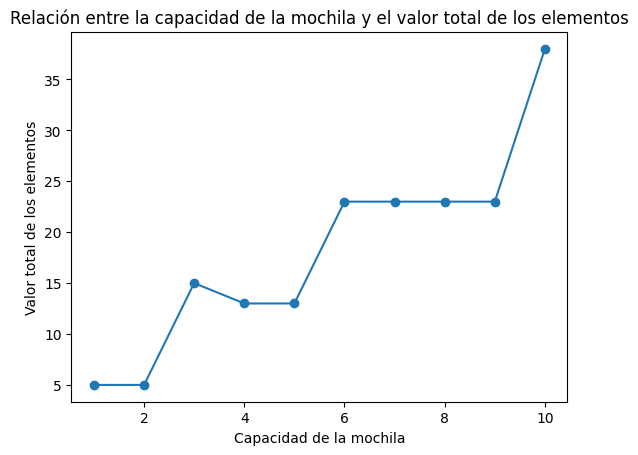

In [ ]:
# trazar el gráfico
plt.plot(capacidades, valores_totales, marker='o')
plt.title("Relación entre la capacidad de la mochila y el valor total de los elementos")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Valor total de los elementos")
plt.show()

Implementación del problema de la mochila como código:
En esta sección, el código que verás, es para la demostración de el tiempo de ejecucuión respecto a la capacidad de la mochila usando programación dinámica

In [ ]:
import time

Función encargada de solucionar el problema de la mochila (lo más cercano al código AMPL)

In [ ]:
def knapsack(capacidad, valores, pesos):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], valores[i - 1] + matriz[i - 1][j - pesos[i - 1]])
            else:
                matriz[i][j] = matriz[i - 1][j]
    return matriz[n][capacidad]

Medición del tiempo con la libreria time y la función "time.time()"

In [ ]:
# medir el tiempo de ejecución para diferentes capacidades de mochila
capacidades = range(1, 11)
tiempos = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    tiempos.append(fin - inicio)

Graficación

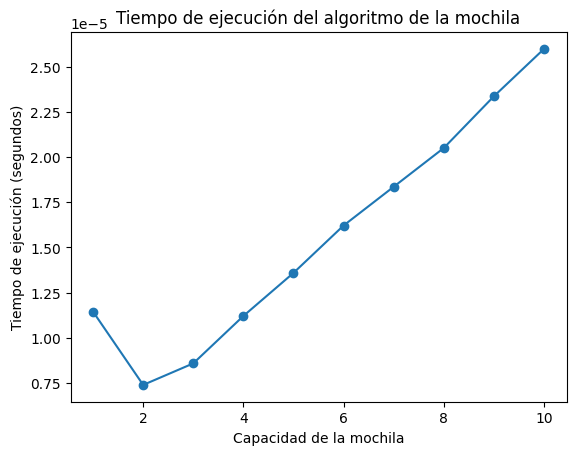

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos, marker='o')
plt.title("Tiempo de ejecución del algoritmo de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.show()

Ahora analizaremos el código pero con el método greedy


In [ ]:
def knapsack(capacidad, valores, pesos):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], valores[i - 1] + matriz[i - 1][j - pesos[i - 1]])
            else:
                matriz[i][j] = matriz[i - 1][j]
    return matriz[n][capacidad]


Medición del Tiempo

In [ ]:
# medir el tiempo de ejecución para diferentes capacidades de mochila
capacidades = range(1, 11)
tiempos = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    tiempos.append(fin - inicio)

Graficación

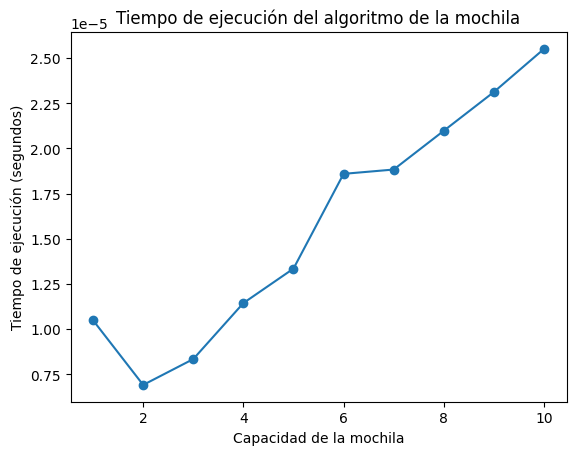

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos, marker='o')
plt.title("Tiempo de ejecución del algoritmo de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.show()

A continuación, verás el problema de mochila pero con su implementación a fuerza bruta


In [ ]:
def knapsack_brute_force(capacidad, valores, pesos):
    n = len(valores)
    max_valor = 0
    for i in range(2**n):
        binario = bin(i)[2:].zfill(n)
        peso_actual = sum(int(binario[j]) * pesos[j] for j in range(n))
        if peso_actual <= capacidad:
            valor_actual = sum(int(binario[j]) * valores[j] for j in range(n))
            max_valor = max(max_valor, valor_actual)
    return max_valor

Medición del tiempo

In [ ]:
# medir el tiempo de ejecución para diferentes capacidades de mochila
capacidades = range(1, 11)
tiempos = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    tiempos.append(fin - inicio)

Graficación

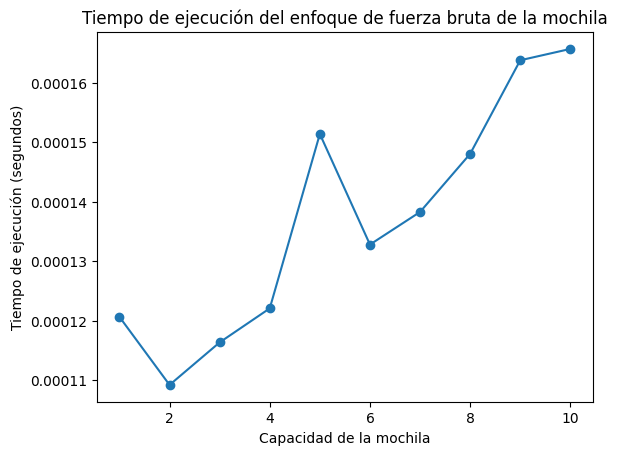

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos, marker='o')
plt.title("Tiempo de ejecución del enfoque de fuerza bruta de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.show()

Ejecuciones paralelas y secuenciales para cada Método

Método "Programación Dinámica"

In [ ]:
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from multiprocessing import Pool
import persim
from multiprocessing import Pool
from ripser import ripser
from ripser import *
from persim import plot_diagrams

In [ ]:
def knapsack(capacidad, valores, pesos):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], valores[i - 1] + matriz[i - 1][j - pesos[i - 1]])
            else:
                matriz[i][j] = matriz[i - 1][j]
    return matriz[n][capacidad]


In [ ]:
def knapsack_parallel(capacidad):
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
valores = [60, 100, 120, 50, 80]
pesos = [10, 20, 30, 15, 25]

# medición de tiempos secuenciales
capacidades = range(1, 11)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    matrizA= knapsack(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)


In [ ]:
# Concatenar los datos de tiempo de ejecución para ambas versiones
tiempos_totales = tiempos_secuencial + tiempos_paralelo

# Crear una lista que indique a qué versión pertenece cada tiempo de ejecución
versiones = ['Secuencial'] * len(tiempos_secuencial) + ['Paralelo'] * len(tiempos_paralelo)

# Realizar el ANOVA
f_val, p_val = stats.f_oneway(tiempos_secuencial, tiempos_paralelo)

# Imprimir los resultados
print("Valor F:", f_val)
print("Valor p:", p_val)

# Realizar una prueba de hipótesis
if p_val < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")

In [ ]:
# medición de tiempos paralelos
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(knapsack_parallel, capacidades)
pool.close()
pool.join()

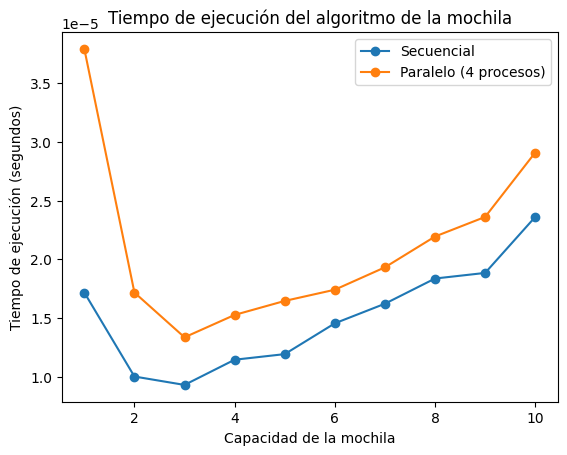

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del algoritmo de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

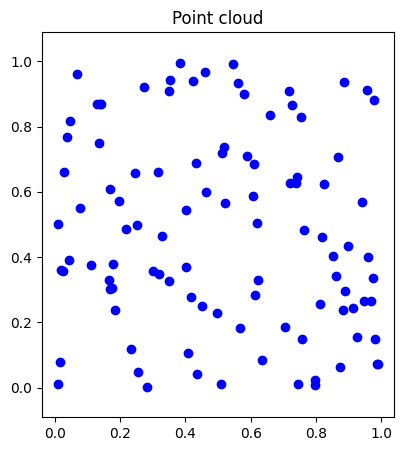

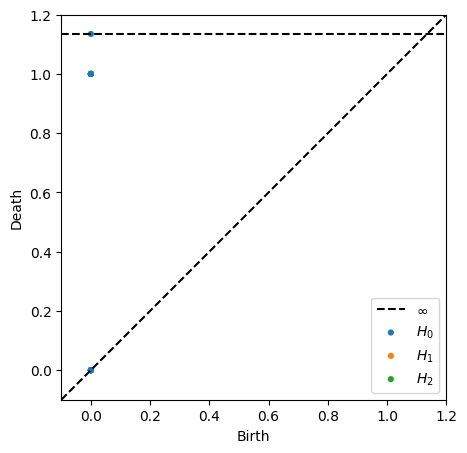

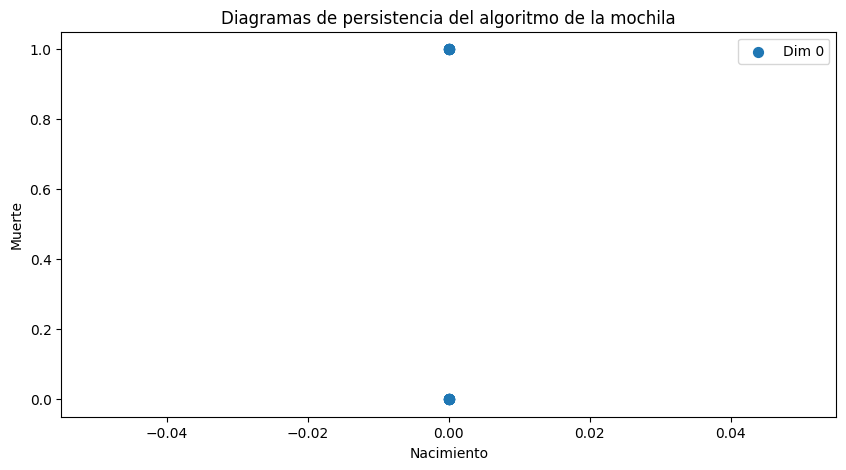

In [ ]:
# construir el conjunto de datos para TDA
datos_TDA = []
for i, capacidad in enumerate(capacidades):
    tiempo_secuencial = tiempos_secuenciales[i]
    tiempo_paralelo = tiempos_paralelos[i]
    datos_TDA.append([capacidad, tiempo_secuencial])
    datos_TDA.append([capacidad, tiempo_paralelo])

# calcular los diagramas de persistencia con Ripser
rips = ripser(np.array(datos_TDA), maxdim=2, distance_matrix=False)
diagramas_persistencia = rips['dgms']
#Crear una nube de puntos aleatoria.
X = np.random.random((100, 2))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.axis('equal')
plt.title('Point cloud')

# trazar el gráfico de dispersión de Persim
plt.figure(figsize=(10,5))
persim.plot_diagrams(diagramas_persistencia, show=True)
# mostrar los gráficos
plt.show()

# trazar el gráfico de los diagramas de persistencia con matplotlib
plt.figure(figsize=(10,5))
for dim in range(len(diagramas_persistencia)):
    diagrama = diagramas_persistencia[dim]
    if len(diagrama) > 0:
        xs = [x[0] for x in diagrama]
        ys = [x[1] for x in diagrama]
        plt.scatter(xs, ys, label=f"Dim {dim}", s=50)
plt.title("Diagramas de persistencia del algoritmo de la mochila")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.legend()


Método "greedy"

In [ ]:
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
from multiprocessing import Pool


In [ ]:
def knapsack(capacidad, valores, pesos):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], valores[i - 1] + matriz[i - 1][j - pesos[i - 1]])
            else:
                matriz[i][j] = matriz[i - 1][j]
    return matriz[n][capacidad]

In [ ]:
def knapsack_wrapper(args):
    capacidad, valores, pesos = args
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
# configuración
capacidades = range(1, 11)
valores = [10, 40, 30, 50]
pesos = [5, 4, 6, 3]


In [ ]:
# versión secuencial
tiempos_secuencial = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuencial.append(fin - inicio)

In [ ]:
# versión paralela
tiempos_paralelo = []
pool = Pool()
args = [(capacidad, valores, pesos) for capacidad in capacidades]
tiempos_paralelo = pool.map(knapsack_wrapper, args)
pool.close()
pool.join()

In [ ]:
# Concatenar los datos de tiempo de ejecución para ambas versiones
tiempos_totales = tiempos_secuencial + tiempos_paralelo

# Crear una lista que indique a qué versión pertenece cada tiempo de ejecución
versiones = ['Secuencial'] * len(tiempos_secuencial) + ['Paralelo'] * len(tiempos_paralelo)

# Realizar el ANOVA
f_val, p_val = stats.f_oneway(tiempos_secuencial, tiempos_paralelo)

# Imprimir los resultados
print("Valor F:", f_val)
print("Valor p:", p_val)

# Realizar una prueba de hipótesis
if p_val < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")

Valor F: 2.8757979274265217
Valor p: 0.10714745264851924
No hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.


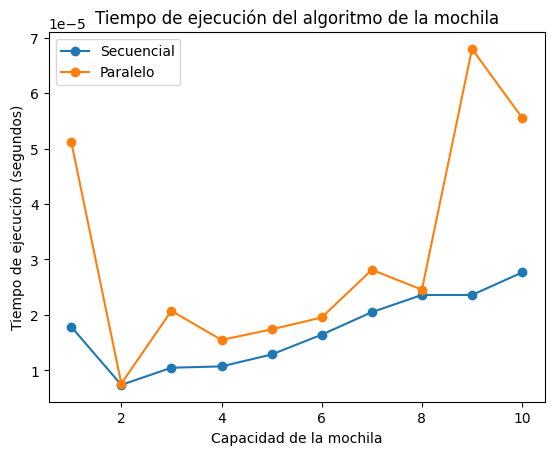

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos_secuencial, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelo, marker='o', label='Paralelo')
plt.title("Tiempo de ejecución del algoritmo de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

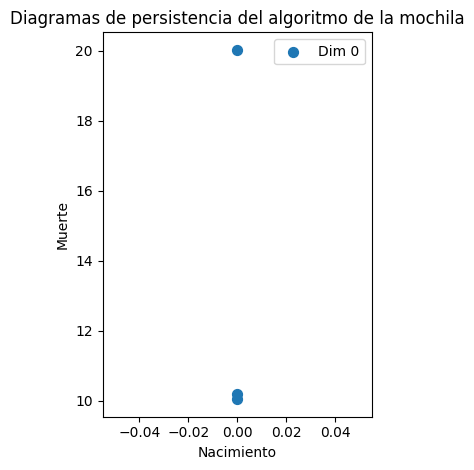

Text(0.5, 1.0, 'Point cloud')

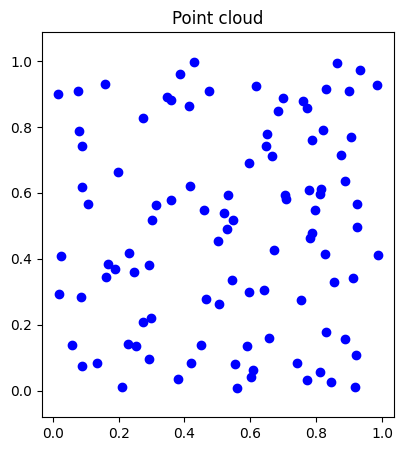

In [ ]:
# Graficar diagramas de persistencia
plt.subplot(1, 2, 2)
for dim in range(len(dgms)):
    diagrama = dgms[dim]
    if len(diagrama) > 0:
        xs = [x[0] for x in diagrama]
        ys = [x[1] for x in diagrama]
        plt.scatter(xs, ys, label=f"Dim {dim}", s=50)
plt.title("Diagramas de persistencia del algoritmo de la mochila")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.legend()

plt.tight_layout()
plt.show()
#Crear una nube de puntos aleatoria.
X = np.random.random((100, 2))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.axis('equal')
plt.title('Point cloud')



Método Fuerza Bruta




In [ ]:
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from multiprocessing import Pool



In [ ]:
def knapsack_brute_force(capacidad, valores, pesos):
    n = len(valores)
    max_valor = 0
    for i in range(2**n):
        binario = bin(i)[2:].zfill(n)
        peso_actual = sum(int(binario[j]) * pesos[j] for j in range(n))
        if peso_actual <= capacidad:
            valor_actual = sum(int(binario[j]) * valores[j] for j in range(n))
            max_valor = max(max_valor, valor_actual)
    return max_valor

In [ ]:
# Medición de tiempos secuenciales
capacidades = range(1, 11)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)

In [ ]:
# Medición de tiempos paralelos
def calcular_tiempo(capacidad):
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(calcular_tiempo, capacidades)
pool.close()
pool.join()

In [ ]:
# Concatenar los datos de tiempo de ejecución para ambas versiones
tiempos_totales = tiempos_secuencial + tiempos_paralelo

# Crear una lista que indique a qué versión pertenece cada tiempo de ejecución
versiones = ['Secuencial'] * len(tiempos_secuencial) + ['Paralelo'] * len(tiempos_paralelo)

# Realizar el ANOVA
f_val, p_val = stats.f_oneway(tiempos_secuencial, tiempos_paralelo)

# Imprimir los resultados
print("Valor F:", f_val)
print("Valor p:", p_val)

# Realizar una prueba de hipótesis
if p_val < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")


Valor F: 5.219492346444489
Valor p: 0.034690076378238885
Hay evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.


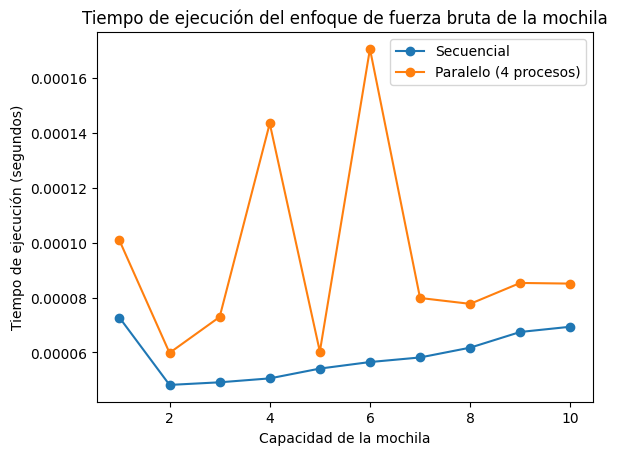

In [ ]:
# Trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del enfoque de fuerza bruta de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

In [ ]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.8 MB/s eta 0:00:00


In [ ]:
import gudhi as gd

/usr/local/lib/python3.9/dist-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/persim/visuals.py:155: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([x_down, x_up])
/usr/local/lib/python3.9/dist-packages/persim/visuals.py:156: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([y_down, y_up])


Text(0.5, 1.0, 'Point cloud')

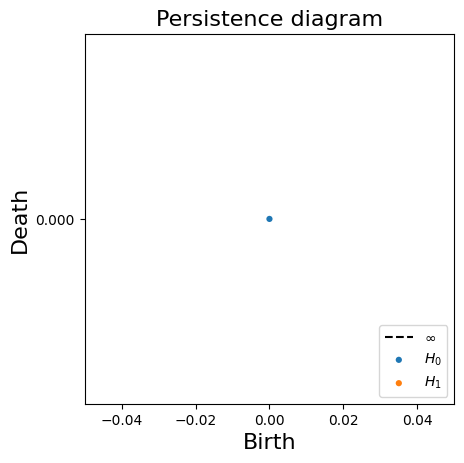

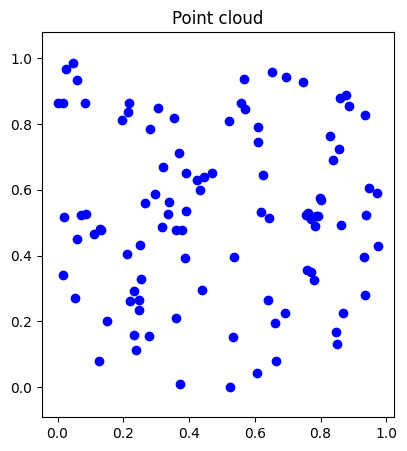

In [ ]:
# Realizar la modelización TDA
complex = gd.SimplexTree()
for i in range(len(valores)):
    complex.insert([i], filtration=valores[i])
for i in range(len(valores)):
    for j in range(i+1, len(valores)):
        complex.insert([i, j], filtration=valores[i]+valores[j])
persistence = complex.persistence()
gd.plot_persistence_diagram(persistence)

datos = np.array([tiempos_totales])
dgms = ripser(datos, maxdim=1)['dgms']
plot_diagrams(dgms)

#Crear una nube de puntos aleatoria.
X = np.random.random((100, 2))

# calcular los diagramas de persistencia
dgms = ripser(X)['dgms']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.axis('equal')
plt.title('Point cloud')

Experimentos paralelo vs Secuencial para cada Método con pesos mayores

Ejecucion paralela vs secuencial con el método Programación Lineal




In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from multiprocessing import Pool


In [ ]:
def knapsack(capacidad, valores, pesos):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], valores[i - 1] + matriz[i - 1][j - pesos[i - 1]])
            else:
                matriz[i][j] = matriz[i - 1][j]
    return matriz[n][capacidad]

In [ ]:
def knapsack_parallel(capacidad):
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
valores = [60, 100, 120, 50, 80]
pesos = np.arange(1000, 10000, 70).tolist()
pesos += np.arange(50, 131, 10).tolist()

# medición de tiempos secuenciales
capacidades = range(1, 50)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)

In [ ]:
# medición de tiempos paralelos
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(knapsack_parallel, capacidades)
pool.close()
pool.join()

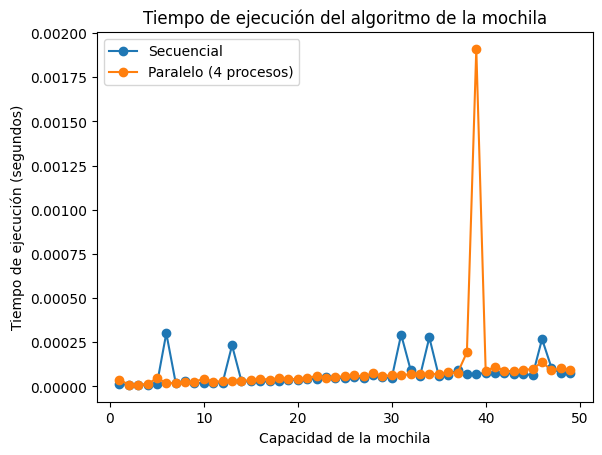

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del algoritmo de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

Método Greedy

In [ ]:
def knapsack_greedy(capacidad, valores, pesos):
    n = len(valores)
    # calcular ratios de valor/peso
    ratios = [valores[i] / pesos[i] for i in range(n)]
    # ordenar índices por ratio de valor/peso
    indices_ordenados = sorted(range(n), key=lambda i: ratios[i], reverse=True)
    # llenar la mochila con los ítems más valiosos
    total_valor = 0
    total_peso = 0
    for i in indices_ordenados:
        if total_peso + pesos[i] <= capacidad:
            total_valor += valores[i]
            total_peso += pesos[i]
        else:
            break
    return total_valor


In [ ]:
def knapsack_greedy_parallel(capacidad):
    inicio = time.time()
    knapsack_greedy(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
valores = [60, 100, 120, 50, 80]
pesos = np.arange(1000, 10000, 70).tolist()
pesos += np.arange(50, 131, 10).tolist()

In [ ]:
# medición de tiempos secuenciales
capacidades = range(1, 5000)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack_greedy(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)

In [ ]:
# medición de tiempos paralelos
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(knapsack_greedy_parallel, capacidades)
pool.close()
pool.join()

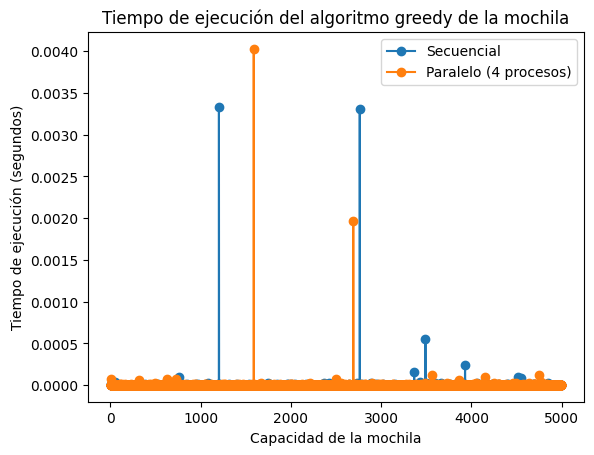

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del algoritmo greedy de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

Método Fuerza Bruta

In [ ]:
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from multiprocessing import Pool

In [ ]:
# Crear lista de valores y pesos
n = 10
valores = [i*100 for i in range(1, n+1)]
pesos = [i*70 for i in range(1, n+1)]
pesos += [i*20 for i in range(1, 4)]
pesos += [i*10 for i in range(4, 7)]
pesos += [i*5 for i in range(7, 11)]

In [ ]:
def knapsack_brute_force(capacidad, valores, pesos):
    n = len(valores)
    max_valor = 0
    for i in range(2**n):
        binario = bin(i)[2:].zfill(n)
        peso_actual = sum(int(binario[j]) * pesos[j] for j in range(n))
        if peso_actual <= capacidad:
            valor_actual = sum(int(binario[j]) * valores[j] for j in range(n))
            max_valor = max(max_valor, valor_actual)
    return max_valor

In [ ]:
# Medición de tiempos secuenciales
capacidades = range(1, 5000)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)

In [ ]:
# Medición de tiempos paralelos
def calcular_tiempo(capacidad):
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(calcular_tiempo, capacidades)
pool.close()
pool.join()

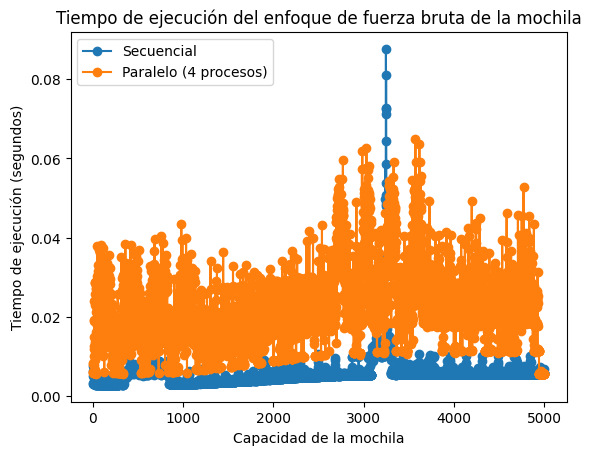

In [ ]:
# Trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del enfoque de fuerza bruta de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

Modelación TDA


In [ ]:
import sys
print(sys.version)


3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


In [ ]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.2 MB/s eta 0:00:00


In [ ]:
!pip install ripser



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp39-cp39-linux_x86_64.whl size=686677 sha256=22c416bb421c88223d0aaded42e4fc7a439a5931f35a5ba8a075bf313e0ef80e
  Stored in directory: /root/.cache/pip/wheels/84/a5/30/d8e516decf393f419edbc9f4311addcb3f164b87c671ea6d21
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18117 sha256=eedbca38ca6b4013dee9a35c1bedf0730420f0567b6f0291180f361dd2e4ea91
  Stored in directory: /root/.cache/pip/wheels/57/16/69/97f76cd294aad962fc5e1a15ab19c07fd885016deda8f200c3
Successfully built ripse

Modelado TDA Método Programación Dinámica

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import persim
from multiprocessing import Pool
from ripser import ripser
from ripser import *
from persim import plot_diagrams


In [ ]:
def knapsack(capacidad, valores, pesos):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], valores[i - 1] + matriz[i - 1][j - pesos[i - 1]])
            else:
                matriz[i][j] = matriz[i - 1][j]
    return matriz[n][capacidad]

In [ ]:
def knapsack_parallel(capacidad):
    inicio = time.time()
    knapsack(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
valores = [60, 100, 120, 50, 80]
pesos = np.arange(1000, 10000, 70).tolist()
pesos += np.arange(50, 131, 10).tolist()

In [ ]:
# medición de tiempos secuenciales
capacidades = range(1, 50)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    MatrizA = knapsack(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)


In [ ]:
# medición de tiempos paralelos
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(knapsack_parallel, capacidades)
pool.close()
pool.join()

In [ ]:
# construir el conjunto de datos para TDA
datos_TDA = []
for i, capacidad in enumerate(capacidades):
    tiempo_secuencial = tiempos_secuenciales[i]
    tiempo_paralelo = tiempos_paralelos[i]
    datos_TDA.append([capacidad, tiempo_secuencial])
    datos_TDA.append([capacidad, tiempo_paralelo])

In [ ]:
# calcular los diagramas de persistencia con Ripser
rips = ripser(np.array(datos_TDA), maxdim=2, distance_matrix=False)
diagramas_persistencia = rips['dgms']

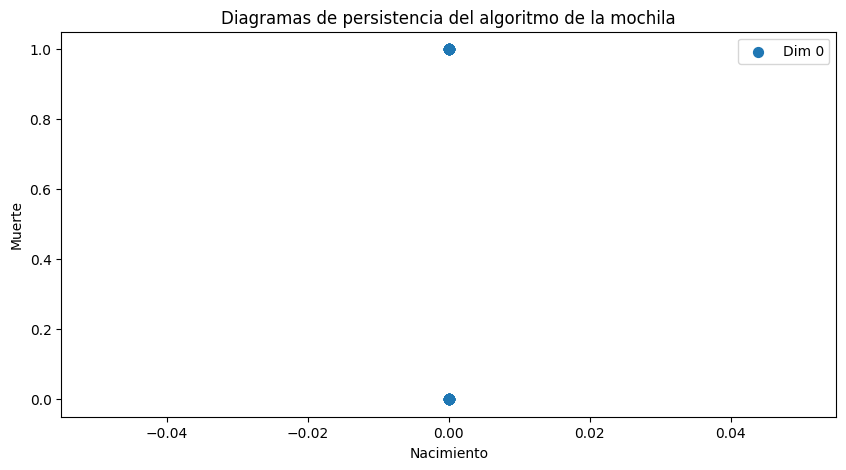

In [ ]:
# trazar el gráfico de los diagramas de persistencia con matplotlib
plt.figure(figsize=(10,5))
for dim in range(len(diagramas_persistencia)):
    diagrama = diagramas_persistencia[dim]
    if len(diagrama) > 0:
        xs = [x[0] for x in diagrama]
        ys = [x[1] for x in diagrama]
        plt.scatter(xs, ys, label=f"Dim {dim}", s=50)
plt.title("Diagramas de persistencia del algoritmo de la mochila")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.legend()

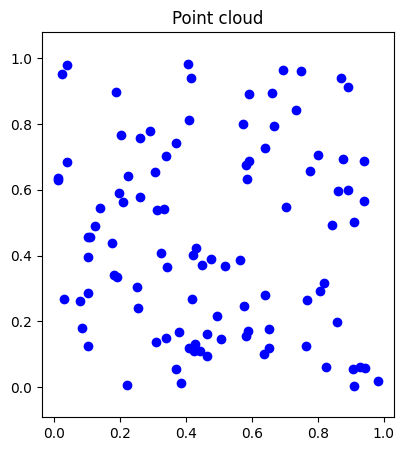

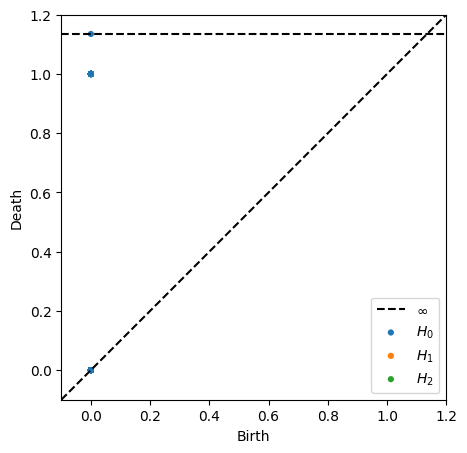

In [ ]:
#Crear una nube de puntos aleatoria.
X = np.random.random((100, 2))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.axis('equal')
plt.title('Point cloud')

# trazar el gráfico de dispersión de Persim
plt.figure(figsize=(10,5))
persim.plot_diagrams(diagramas_persistencia, show=True)
# mostrar los gráficos
plt.show()

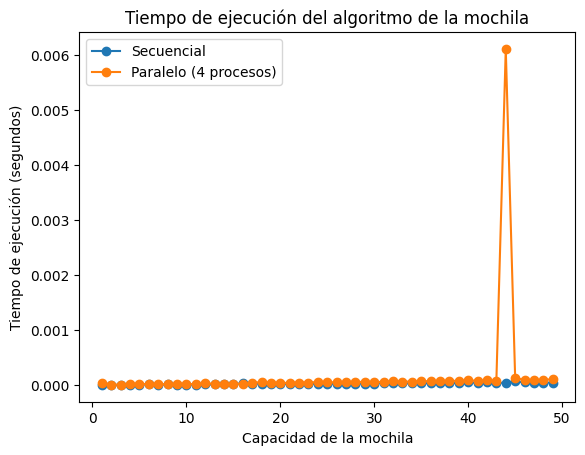

In [ ]:
# trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del algoritmo de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

Modelado TDA Método Greedy

In [ ]:
import time
import ripser
import numpy as np
import persim
import matplotlib.pyplot as plt
from multiprocessing import Pool
from ripser import ripser
from ripser import *
from persim import plot_diagrams


In [ ]:
def knapsack_greedy(capacidad, valores, pesos):
    n = len(valores)
    # calcular ratios de valor/peso
    ratios = [valores[i] / pesos[i] for i in range(n)]
    # ordenar índices por ratio de valor/peso
    indices_ordenados = sorted(range(n), key=lambda i: ratios[i], reverse=True)
    # llenar la mochila con los ítems más valiosos
    total_valor = 0
    total_peso = 0
    for i in indices_ordenados:
        if total_peso + pesos[i] <= capacidad:
            total_valor += valores[i]
            total_peso += pesos[i]
        else:
            break
    return total_valor

In [ ]:
def knapsack_greedy_parallel(capacidad):
    inicio = time.time()
    knapsack_greedy(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
valores = [60, 100, 120, 50, 80]
pesos = np.arange(1000, 10000, 70).tolist()
pesos += np.arange(50, 131, 10).tolist()

In [ ]:
# medición de tiempos secuenciales
capacidades = range(1, 5000)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack_greedy(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)

In [ ]:
# medición de tiempos paralelos
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(knapsack_greedy_parallel, capacidades)
pool.close()
pool.join()

In [ ]:
# Ajustar el tamaño del arreglo de pesos para que tenga la misma longitud que el arreglo de valores
n = min(len(pesos), len(valores))
pesos = pesos[:n]
valores = valores[:n]

# calcular homología persistente
if len(pesos) != len(valores):
    raise ValueError("Los arreglos de pesos y valores deben tener la misma longitud")

X = np.vstack([pesos, valores]).T
dgms = ripser(X, maxdim=1)['dgms']

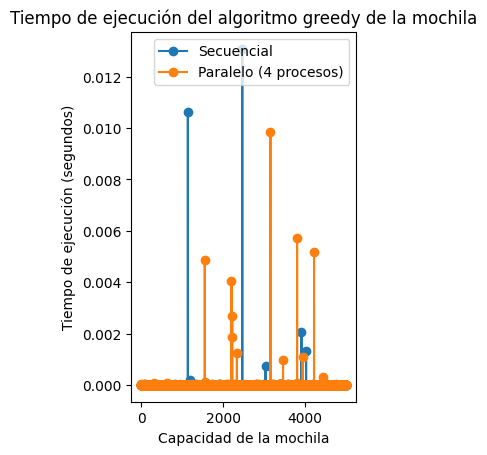

In [ ]:
# trazar el gráfico
plt.subplot(1,2,1)
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del algoritmo greedy de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()

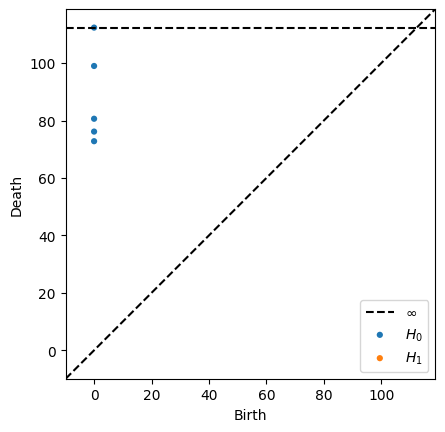

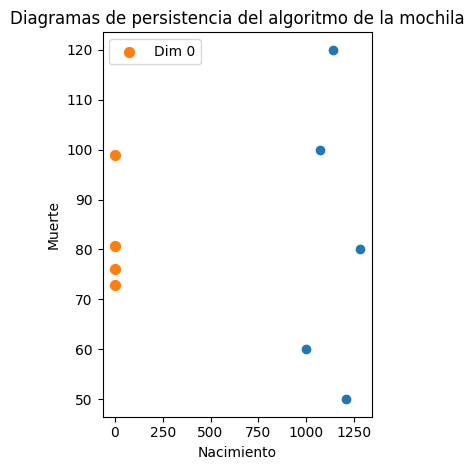

In [ ]:
# Graficar diagramas de persistencia
plt.subplot(1, 2, 2)
for dim in range(len(dgms)):
    diagrama = dgms[dim]
    if len(diagrama) > 0:
        xs = [x[0] for x in diagrama]
        ys = [x[1] for x in diagrama]
        plt.scatter(xs, ys, label=f"Dim {dim}", s=50)
plt.title("Diagramas de persistencia del algoritmo de la mochila")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.legend()

plt.tight_layout()
plt.show()

Modelado TDA Método Programación Fuerza Bruta

In [ ]:
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import gudhi as gd
import numpy as np
from multiprocessing import Pool
from ripser import ripser
from persim import plot_diagrams


In [ ]:
# Crear lista de valores y pesos
n = 10
valores = [i*100 for i in range(1, n+1)]
pesos = [i*70 for i in range(1, n+1)]
pesos += [i*20 for i in range(1, 4)]
pesos += [i*10 for i in range(4, 7)]
pesos += [i*5 for i in range(7, 11)]

In [ ]:
def knapsack_brute_force(capacidad, valores, pesos):
    n = len(valores)
    max_valor = 0
    for i in range(2**n):
        binario = bin(i)[2:].zfill(n)
        peso_actual = sum(int(binario[j]) * pesos[j] for j in range(n))
        if peso_actual <= capacidad:
            valor_actual = sum(int(binario[j]) * valores[j] for j in range(n))
            max_valor = max(max_valor, valor_actual)
    return max_valor

In [ ]:
# Medición de tiempos secuenciales
capacidades = range(1, 11)
tiempos_secuenciales = []
for capacidad in capacidades:
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    tiempos_secuenciales.append(fin - inicio)


In [ ]:
# Medición de tiempos paralelos
def calcular_tiempo(capacidad):
    inicio = time.time()
    knapsack_brute_force(capacidad, valores, pesos)
    fin = time.time()
    return fin - inicio

In [ ]:
num_procesos = 4
pool = Pool(num_procesos)
tiempos_paralelos = pool.map(calcular_tiempo, capacidades)
pool.close()
pool.join()

In [ ]:
# Concatenar los datos de tiempo de ejecución para ambas versiones
tiempos_totales = tiempos_secuenciales + tiempos_paralelos

# Crear una lista que indique a qué versión pertenece cada tiempo de ejecución
versiones = ['Secuencial'] * len(tiempos_secuenciales) + ['Paralelo'] * len(tiempos_paralelos)

In [ ]:
# Realizar el ANOVA
f_val, p_val = stats.f_oneway(tiempos_secuenciales, tiempos_paralelos)

# Imprimir los resultados
print("Valor F:", f_val)
print("Valor p:", p_val)
# Realizar una prueba de hipótesis
if p_val < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.")

Valor F: 35.80133184346109
Valor p: 1.1659402804858068e-05
Hay evidencia para rechazar la hipótesis nula de que no hay diferencia significativa entre las versiones secuencial y paralela.


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

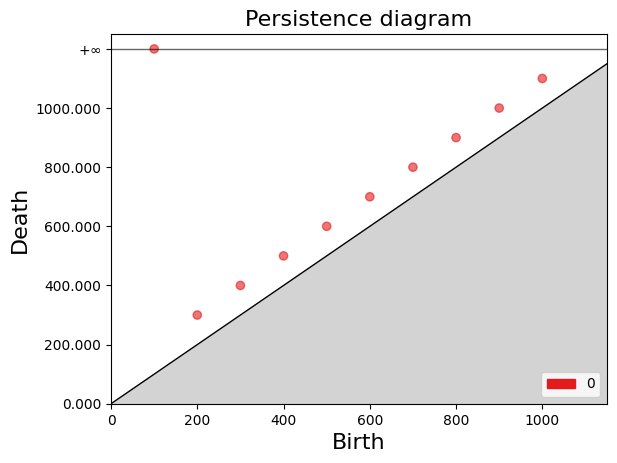

In [ ]:
# Realizar la modelización TDA
complex = gd.SimplexTree()
for i in range(len(valores)):
    complex.insert([i], filtration=valores[i])
for i in range(len(valores)):
    for j in range(i+1, len(valores)):
        complex.insert([i, j], filtration=valores[i]+valores[j])
persistence = complex.persistence()
gd.plot_persistence_diagram(persistence)

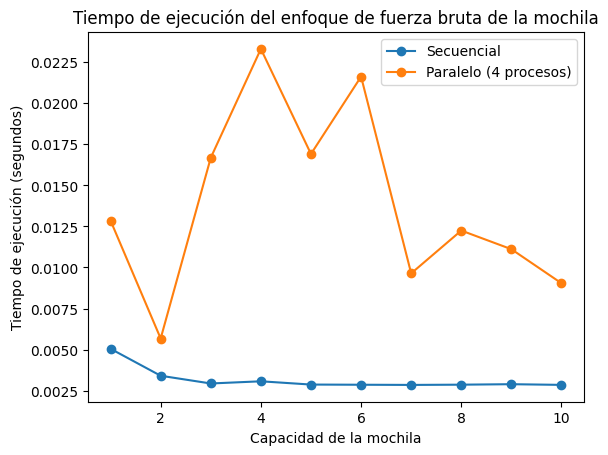

In [ ]:
# Trazar el gráfico
plt.plot(capacidades, tiempos_secuenciales, marker='o', label='Secuencial')
plt.plot(capacidades, tiempos_paralelos, marker='o', label=f'Paralelo ({num_procesos} procesos)')
plt.title("Tiempo de ejecución del enfoque de fuerza bruta de la mochila")
plt.xlabel("Capacidad de la mochila")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/persim/visuals.py:155: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([x_down, x_up])
/usr/local/lib/python3.9/dist-packages/persim/visuals.py:156: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([y_down, y_up])


Text(0.5, 1.0, 'Point cloud')

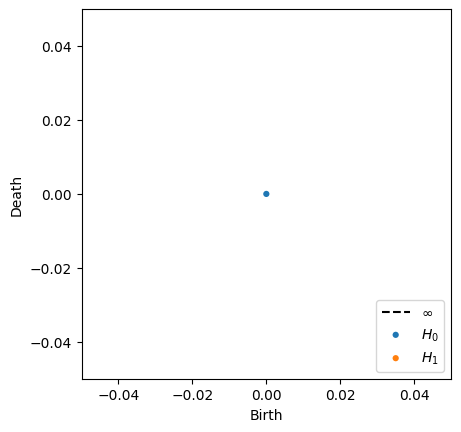

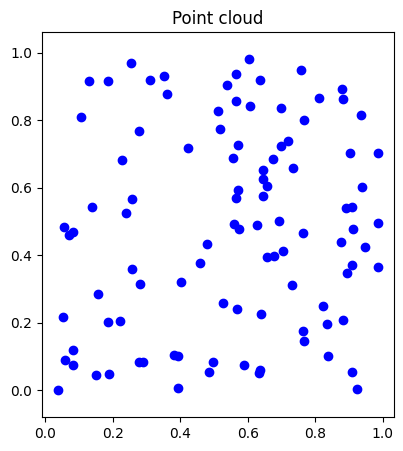

In [ ]:
datos = np.array([tiempos_totales])
dgms = ripser(datos, maxdim=1)['dgms']
plot_diagrams(dgms)

#Crear una nube de puntos aleatoria.
X = np.random.random((100, 2))

# calcular los diagramas de persistencia
dgms = ripser(X)['dgms']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.axis('equal')
plt.title('Point cloud')

Heuristica 0/1 para el análisis y resolución del knapsack problem.

In [ ]:
import time
import matplotlib.pyplot as plt

In [ ]:
def mochila_01(valores, pesos, capacidad):
    num_items = len(valores)
    matriz_valor = [[0] * (capacidad + 1) for _ in range(num_items + 1)]

    for i in range(1, num_items + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz_valor[i][j] = max(matriz_valor[i - 1][j], valores[i - 1] + matriz_valor[i - 1][j - pesos[i - 1]])
            else:
                matriz_valor[i][j] = matriz_valor[i - 1][j]

    solucion = []
    j = capacidad
    for i in range(num_items, 0, -1):
        if matriz_valor[i][j] != matriz_valor[i - 1][j]:
            solucion.append(i - 1)
            j -= pesos[i - 1]

    return list(reversed(solucion)), matriz_valor[num_items][capacidad]


instancias = [
    ([60, 100, 120, 70, 40], [10, 20, 30, 40, 50], 100),  # Ejemplo de instancia
    # Agrega más instancias aquí
]

tiempos_ejecucion = []
capacidades = []

for instancia in instancias:
    valores, pesos, capacidad = instancia

    start_time = time.time()
    mejor_solucion, mejor_valor = mochila_01(valores, pesos, capacidad)
    end_time = time.time()

    tiempo_ejecucion = end_time - start_time
    tiempos_ejecucion.append(tiempo_ejecucion)
    capacidades.append(capacidad)

    # Imprimir resultados de la instancia
    print("Instancia:")
    print("Valores:", valores)
    print("Pesos:", pesos)
    print("Capacidad:", capacidad)
    print("Tiempo de ejecución:", tiempo_ejecucion)
    print("Mejor solución:", mejor_solucion)
    print("Mejor valor:", mejor_valor)
    print()

Instancia:
Valores: [60, 100, 120, 70, 40]
Pesos: [10, 20, 30, 40, 50]
Capacidad: 100
Tiempo de ejecución: 0.00019121170043945312
Mejor solución: [0, 1, 2, 3]
Mejor valor: 350



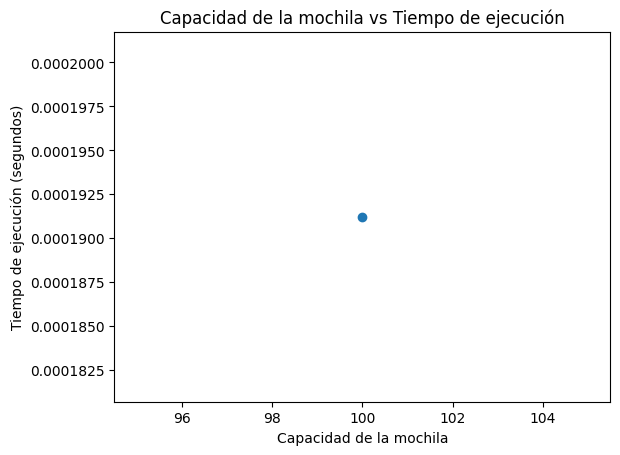

In [ ]:
# Graficar capacidad vs tiempo de ejecución
plt.plot(capacidades, tiempos_ejecucion, marker='o')
plt.xlabel('Capacidad de la mochila')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Capacidad de la mochila vs Tiempo de ejecución')
plt.show()
